<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/MODULE_4_CYBERSECURITY_AI_BASED_AUTOMATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install -U langgraph

In [5]:
from typing import List, Optional, Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image
from operator import add


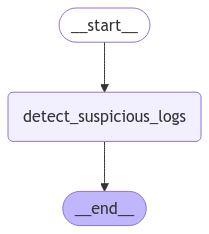

In [9]:
# Input Log Schema
class SystemLog(TypedDict):
    id: str
    timestamp: str
    activity: str
    ip_address: str
    status: str  # e.g., "Success", "Failed"

# 1. Sub-Graph: Threat Detection
class ThreatDetectionState(TypedDict):
    cleaned_logs: List[SystemLog]
    suspicious_logs: List[SystemLog]

class ThreatDetectionOutputState(TypedDict):
    suspicious_logs: List[SystemLog]

def detect_suspicious_logs(state):
    """Detect suspicious activities (e.g., failed login attempts)."""
    cleaned_logs = state["cleaned_logs"]
    suspicious_logs = [log for log in cleaned_logs if log["status"] == "Failed"]
    return {"suspicious_logs": suspicious_logs}

# Create Threat Detection Graph
builder = StateGraph(
    state_schema=ThreatDetectionState,
    input=ThreatDetectionState,
    output=ThreatDetectionOutputState
)
builder.add_node("detect_suspicious_logs", detect_suspicious_logs)
builder.add_edge(START, "detect_suspicious_logs")
builder.add_edge("detect_suspicious_logs", END)
threat_detection_graph = builder.compile()
display(Image(threat_detection_graph.get_graph().draw_mermaid_png()))

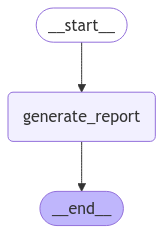

In [10]:
# 2. Sub-Graph: Log Summarization
class LogSummarizationState(TypedDict):
    suspicious_logs: List[SystemLog]
    summary: str

class LogSummarizationOutputState(TypedDict):
    summary: str

def generate_summary(state):
    """Generate summary of suspicious logs."""
    suspicious_logs = state["suspicious_logs"]
    summary = f"Detected {len(suspicious_logs)} suspicious activities."
    return {"summary": summary}

# Create Log Summarization Graph
ls_builder = StateGraph(
    state_schema=LogSummarizationState,
    input=LogSummarizationState,
    output=LogSummarizationOutputState
)
ls_builder.add_node("generate_summary", generate_summary)
ls_builder.add_edge(START, "generate_summary")
ls_builder.add_edge("generate_summary", END)
log_summarization_graph = ls_builder.compile()

# 3. Sub-Graph: Incident Reporting
class IncidentReportingState(TypedDict):
    summary: str
    report: str

class IncidentReportingOutputState(TypedDict):
    report: str

def generate_report(state):
    """Generate an incident report."""
    summary = state["summary"]
    report = f"Incident Report:\n{summary}\nPlease investigate immediately."
    return {"report": report}

# Create Incident Reporting Graph
builder = StateGraph(
    state_schema=IncidentReportingState,
    input=IncidentReportingState,
    output=IncidentReportingOutputState
)
builder.add_node("generate_report", generate_report)
builder.add_edge(START, "generate_report")
builder.add_edge("generate_report", END)
incident_reporting_graph = builder.compile()
display(Image(incident_reporting_graph.get_graph().draw_mermaid_png()))

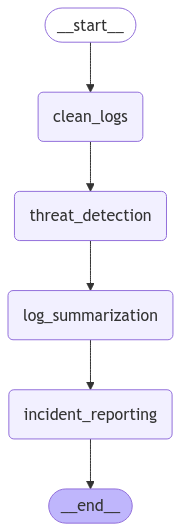

In [11]:
# 4. Parent Graph: Combine All Sub-Graphs
class ParentGraphState(TypedDict):
    raw_logs: List[SystemLog]
    cleaned_logs: Annotated[List[SystemLog], add]
    suspicious_logs: List[SystemLog]
    summary: str
    report: str

def clean_logs(state):
    """Clean raw logs (simulate cleaning process)."""
    raw_logs = state["raw_logs"]
    return {"cleaned_logs": raw_logs}

# Create Parent Graph
parent_builder = StateGraph(state_schema=ParentGraphState)
parent_builder.add_node("clean_logs", clean_logs)
parent_builder.add_node("threat_detection", threat_detection_graph)
parent_builder.add_node("log_summarization", log_summarization_graph)
parent_builder.add_node("incident_reporting", incident_reporting_graph)

# Define Edges
parent_builder.add_edge(START, "clean_logs")
parent_builder.add_edge("clean_logs", "threat_detection")
parent_builder.add_edge("threat_detection", "log_summarization")
parent_builder.add_edge("log_summarization", "incident_reporting")
parent_builder.add_edge("incident_reporting", END)

# Compile Parent Graph
parent_graph = parent_builder.compile()
display(Image(parent_graph.get_graph().draw_mermaid_png()))


In [15]:
example_logs = [
    {"id": "1", "timestamp": "2025-01-15T10:00:00", "activity": "Login Attempt", "ip_address": "192.168.1.1", "status": "Failed"},
    {"id": "2", "timestamp": "2025-01-15T10:05:00", "activity": "File Access", "ip_address": "192.168.1.2", "status": "Success"},
    {"id": "3", "timestamp": "2025-01-15T10:10:00", "activity": "Login Attempt", "ip_address": "192.168.1.3", "status": "Failed"},
    {"id": "4", "timestamp": "2025-01-15T10:01:00", "activity": "File Access", "ip_address": "192.168.133.1", "status": "Success"}
]

result = parent_graph.invoke({"raw_logs": example_logs})

# Print Results
print(result)

{'raw_logs': [{'id': '1', 'timestamp': '2025-01-15T10:00:00', 'activity': 'Login Attempt', 'ip_address': '192.168.1.1', 'status': 'Failed'}, {'id': '2', 'timestamp': '2025-01-15T10:05:00', 'activity': 'File Access', 'ip_address': '192.168.1.2', 'status': 'Success'}, {'id': '3', 'timestamp': '2025-01-15T10:10:00', 'activity': 'Login Attempt', 'ip_address': '192.168.1.3', 'status': 'Failed'}, {'id': '4', 'timestamp': '2025-01-15T10:01:00', 'activity': 'File Access', 'ip_address': '192.168.133.1', 'status': 'Success'}], 'cleaned_logs': [{'id': '1', 'timestamp': '2025-01-15T10:00:00', 'activity': 'Login Attempt', 'ip_address': '192.168.1.1', 'status': 'Failed'}, {'id': '2', 'timestamp': '2025-01-15T10:05:00', 'activity': 'File Access', 'ip_address': '192.168.1.2', 'status': 'Success'}, {'id': '3', 'timestamp': '2025-01-15T10:10:00', 'activity': 'Login Attempt', 'ip_address': '192.168.1.3', 'status': 'Failed'}, {'id': '4', 'timestamp': '2025-01-15T10:01:00', 'activity': 'File Access', 'ip_a

In [16]:
result

{'raw_logs': [{'id': '1',
   'timestamp': '2025-01-15T10:00:00',
   'activity': 'Login Attempt',
   'ip_address': '192.168.1.1',
   'status': 'Failed'},
  {'id': '2',
   'timestamp': '2025-01-15T10:05:00',
   'activity': 'File Access',
   'ip_address': '192.168.1.2',
   'status': 'Success'},
  {'id': '3',
   'timestamp': '2025-01-15T10:10:00',
   'activity': 'Login Attempt',
   'ip_address': '192.168.1.3',
   'status': 'Failed'},
  {'id': '4',
   'timestamp': '2025-01-15T10:01:00',
   'activity': 'File Access',
   'ip_address': '192.168.133.1',
   'status': 'Success'}],
 'cleaned_logs': [{'id': '1',
   'timestamp': '2025-01-15T10:00:00',
   'activity': 'Login Attempt',
   'ip_address': '192.168.1.1',
   'status': 'Failed'},
  {'id': '2',
   'timestamp': '2025-01-15T10:05:00',
   'activity': 'File Access',
   'ip_address': '192.168.1.2',
   'status': 'Success'},
  {'id': '3',
   'timestamp': '2025-01-15T10:10:00',
   'activity': 'Login Attempt',
   'ip_address': '192.168.1.3',
   'statu

# Summary of the Program
# What We Did:
# Input Logs Processed:

Program ko raw logs diye gaye jo system ki activities ko represent karte hain, jaise login attempts aur file access.
Logs ka structure (SystemLog class) define kiya gaya, taake data consistent aur organized ho.
Log Cleaning:

Raw logs ko directly cleaned logs mein convert kiya gaya. Yahan cleaning ka step simple tha, lekin future mein yeh invalid ya incomplete logs ko remove karne ke liye useful hoga.
Threat Detection Sub-Graph:

Suspicious logs detect kiye gaye:
Failed login attempts ko highlight kiya.
Suspicious activities ka data extract kiya.
Output: Suspicious logs ka filtered list.
Log Summarization Sub-Graph:

Suspicious logs ka analysis kiya aur ek concise summary banayi:
Example: "Detected 2 suspicious activities."
Incident Reporting Sub-Graph:

Suspicious activities aur summary ka ek formal report generate kiya:
Example: "Incident Report:\nDetected 2 suspicious activities.\nPlease investigate immediately."
Parent Graph Integration:

Har sub-graph ko parent graph mein integrate kiya, taake ek centralized flow banaya ja sake.
Sub-graphs parallel aur sequentially kaam karte hain, jis se efficiency badhti hai.
How This Relates to Cybersecurity
Automated Threat Detection:

Program ne failed login attempts jaise suspicious behaviors ko detect kiya, jo brute force attacks ya unauthorized access ki nishani ho sakte hain.
Activity Summarization:

Suspicious logs ka summary generate karke important information pe focus kiya gaya, taake manually analyze karne ki zarurat na pade.
Incident Reporting:

Ek structured incident report generate ki gayi jo real-world incident response team ke liye useful ho sakti hai.
Benefits of This Program
Time Saving:

Large-scale logs ko manually analyze karne ki zarurat nahi hai. Program automatic filtering aur summarization karta hai.
Enhanced Security:

Suspicious activities ko detect karke system ko secure banane mein madad milti hai.
Early detection se attacks ka response time improve hota hai.
Scalability:

Program ko aur zyada logs ya advanced detection ke liye scale kiya ja sakta hai, jaise IP blacklisting ya anomaly detection.
Actionable Insights:

Security teams ko ek concise report milti hai, jo unhe immediate actions lene mein help karti hai.


# ***`How This Helps You as an SOC Analyst L1`***
Time Efficiency:

Manual logs analyze karne ka time drastically reduce hoga.
Aap zyada focus incident resolution pe karenge, na ke data filtering par.
Accuracy:

Program automated analysis karta hai, jo human errors ko minimize karta hai.
Repeated patterns aur suspicious activities miss hone ka chance kam hota hai.
Scalability:

Agar aapke paas large-scale logs (e.g., 10,000+ logs per day) hain, to yeh program unhe efficiently process kar sakta hai.
Actionable Insights:

Aapko ek clear summary aur report milegi jo directly incident response aur threat mitigation mein kaam aayegi.
Real-World Example of Usage
Scenario: Brute Force Attack

Logs mein repeated failed login attempts detect hote hain.
Program suspicious source IPs ko identify karega.
Report generate hogi: "5 failed login attempts detected from IP 203.0.113.45. Possible brute force attack."
Scenario: Unauthorized Access

Aap query karte hain kisi specific destination IP (e.g., server IP) pe unusual activity ke liye.
Program failed access attempts ko summarize karega aur ek report banayega.
Next Steps for Implementation
Enhance the Program:

Source IP aur destination IP ka alag analysis kare.
Advanced detection add kare (e.g., threshold-based alerts).
Integrate with SIEM Tools:

Aap is program ko Splunk, QRadar, ya Wazuh jese tools ke saath integrate kar sakte hain.
Automate Report Delivery:

Suspicious activity report ko directly email ya Slack par send karne ka option add karein.


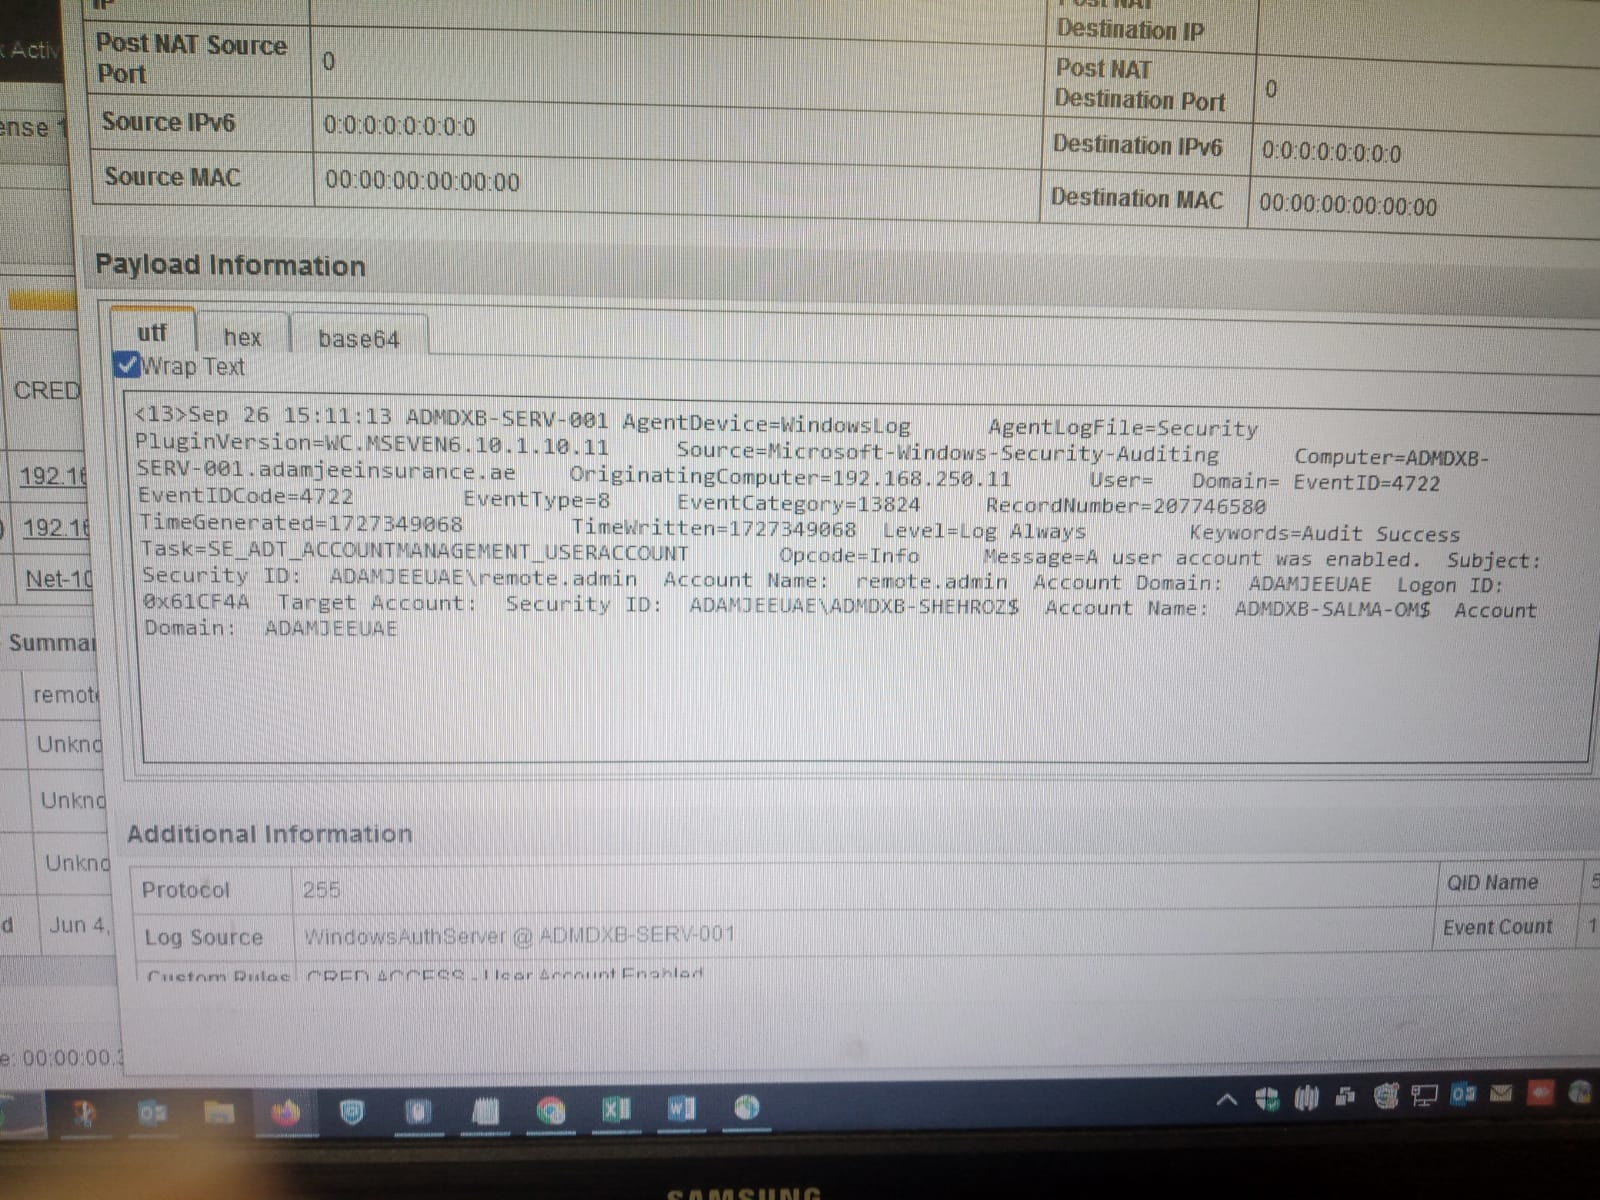

In [27]:
from IPython.display import Image, display

# Apni image ka path yahan likhein
image_path = '/content/b51fb4b0-04e6-4d83-b406-ad92672dbd1a.jpg'

# Passport size ke liye width aur height adjust karna
display(Image(image_path, width=200, height=250))  # Width aur height adjust karein


# ***PERFORM LOGS AND AI-based automation ***

In [30]:
from google.colab import files
uploaded = files.upload()


Saving b42ee08e-b9d0-451e-a173-adc4fad9bab2.jpg to b42ee08e-b9d0-451e-a173-adc4fad9bab2 (1).jpg


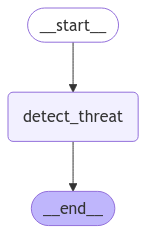

In [17]:
class QradarLog(TypedDict):
    timestamp: str
    event_id: int
    source_ip: str
    computer: str
    target_account: str
    account_domain: str
    status: str

# Sample Log Entry Parsed from QRadar
log_entry = {
    "timestamp": "2025-01-15T15:11:13",
    "event_id": 4722,
    "source_ip": "192.168.250.11",
    "computer": "ADMDXB-SERV-001",
    "target_account": "ADMIXDB-SHEHROZ",
    "account_domain": "ADAMJEUEA",
    "status": "Success"
}

# Sub-Graph: Threat Detection
class ThreatDetectionState(TypedDict):
    log: QradarLog
    is_suspicious: bool

def detect_threat(state):
    """Detect if the log entry is suspicious."""
    suspicious_ips = ["192.168.250.11", "10.0.0.5"]
    log = state["log"]
    is_suspicious = log["source_ip"] in suspicious_ips and log["event_id"] == 4722
    return {"is_suspicious": is_suspicious}

# Threat Detection Graph
builder = StateGraph(state_schema=ThreatDetectionState, input=ThreatDetectionState, output=ThreatDetectionState)
builder.add_node("detect_threat", detect_threat)
builder.add_edge(START, "detect_threat")
builder.add_edge("detect_threat", END)
threat_detection_graph = builder.compile()
display(Image(threat_detection_graph.get_graph().draw_mermaid_png()))

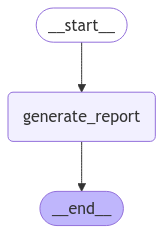

In [18]:
# Sub-Graph: Report Generation
class ReportGenerationState(TypedDict):
    is_suspicious: bool
    report: str

def generate_report(state):
    """Generate a report based on the threat detection."""
    if state["is_suspicious"]:
        report = "Alert! Suspicious activity detected. Investigate immediately."
    else:
        report = "No suspicious activity detected."
    return {"report": report}

# Report Generation Graph
builder = StateGraph(state_schema=ReportGenerationState, input=ReportGenerationState, output=ReportGenerationState)
builder.add_node("generate_report", generate_report)
builder.add_edge(START, "generate_report")
builder.add_edge("generate_report", END)
report_generation_graph = builder.compile()
display(Image(report_generation_graph.get_graph().draw_mermaid_png()))

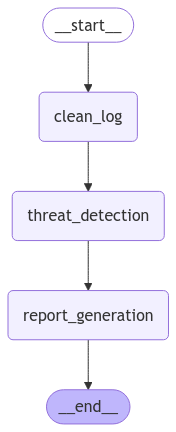

In [19]:
# Parent Graph
class ParentGraphState(TypedDict):
    log: QradarLog
    is_suspicious: bool
    report: str

def clean_log(state):
    """Simulate cleaning the log."""
    return {"log": state["log"]}

parent_builder = StateGraph(state_schema=ParentGraphState)
parent_builder.add_node("clean_log", clean_log)
parent_builder.add_node("threat_detection", threat_detection_graph)
parent_builder.add_node("report_generation", report_generation_graph)

parent_builder.add_edge(START, "clean_log")
parent_builder.add_edge("clean_log", "threat_detection")
parent_builder.add_edge("threat_detection", "report_generation")
parent_builder.add_edge("report_generation", END)

# Compile Parent Graph
parent_graph = parent_builder.compile()
display(Image(parent_graph.get_graph().draw_mermaid_png()))

In [20]:
result = parent_graph.invoke({"log": log_entry})

# Print Results
print("Final Report:")
print(result["report"])

Final Report:
Alert! Suspicious activity detected. Investigate immediately.


In [21]:
result

{'log': {'timestamp': '2025-01-15T15:11:13',
  'event_id': 4722,
  'source_ip': '192.168.250.11',
  'computer': 'ADMDXB-SERV-001',
  'target_account': 'ADMIXDB-SHEHROZ',
  'account_domain': 'ADAMJEUEA',
  'status': 'Success'},
 'is_suspicious': True,
 'report': 'Alert! Suspicious activity detected. Investigate immediately.'}

# ***Why This Approach?***
# Proper Automation:
Yeh solution LangGraph ka use karta hai, jo pehle wali approach ke jesa automated workflow banata hai.

# Log Parsing:
Aapka QRadar log raw format mein tha, isliye humne log ko pehle structured data mein convert kiya aur phir automated analysis kiya.

# Extendable:
Aap is approach ko badhate hue zyada complex rules (e.g., failed attempts threshold, repeated activities) add kar sakte hain.

# ***SET OF RULES OF INVESTIGATION :***
SIEM architecture ek set of rules banata hai aur logs ko filter ya process karta hai. Agar rules na ho, to SIEM tools ya koi bhi AI-based solution accurate investigation nahi kar sakta, kyunki investigation ke liye context aur threshold values zaruri hoti hain.

Lekin, agar rules define na kiye gaye ho, to AI ka role zyada behavioral analysis aur anomaly detection mein hota hai. Yahan, hum ek approach dekhte hain jisme rules ke bagair AI-based investigation kiya jaye.

1. Why Rules Are Crucial in SIEM?
Rules ka purpose:

Filter Logs:
Har log ko suspicious ya benign categories mein divide karna.
Detect Known Threats:
Known patterns (e.g., brute force, malware activity) ke against actions lena.
Prioritize Alerts:
High-risk activities pe focus karna aur false positives reduce karna.
2. Investigation Without Rules
Agar rules na ho, to hum AI aur ML-based approaches use karte hain:

Behavioral Analysis:
Logs ka normal behavior (e.g., traffic patterns, process execution) learn karna aur abnormal patterns ko flag karna.
Anomaly Detection:
Logs mein unusual activity ko detect karna jo standard nahi lagti.
Threat Intelligence Integration:
AI ko external threat databases ke saath connect karna, jo IPs, processes, aur URLs ke known malicious behavior ko track karte hain.
3. Approach for Investigation Without Rules
Hum AI-based anomaly detection aur unsupervised learning techniques ka use karenge, jo logs mein abnormal patterns detect karega bina predefined rules ke.

# Example Code: Anomaly Detection
Yahan ek simplified example hai jo logs ko normal aur abnormal behavior ke liye analyze karega:

In [31]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Example Logs (Dummy Data)
logs = [
    {"source_ip": "192.168.1.10", "event_id": 4624, "activity": "Login Success", "duration": 1},
    {"source_ip": "192.168.1.15", "event_id": 4625, "activity": "Login Failure", "duration": 5},
    {"source_ip": "203.0.113.5", "event_id": 4720, "activity": "New Account Created", "duration": 50},
    {"source_ip": "10.0.0.1", "event_id": 4688, "activity": "Process Creation", "duration": 3},
    {"source_ip": "192.168.1.10", "event_id": 4624, "activity": "Login Success", "duration": 2},
]

# Convert Logs to Numerical Features
log_features = np.array([
    [log["event_id"], log["duration"]] for log in logs
])

# Train Anomaly Detection Model
model = IsolationForest(contamination=0.2)  # 20% data will be treated as anomalies
model.fit(log_features)

# Predict Anomalies
predictions = model.predict(log_features)

# Add Predictions to Logs
for i, log in enumerate(logs):
    log["anomaly"] = "Yes" if predictions[i] == -1 else "No"

# Print Results
for log in logs:
    print(log)


{'source_ip': '192.168.1.10', 'event_id': 4624, 'activity': 'Login Success', 'duration': 1, 'anomaly': 'No'}
{'source_ip': '192.168.1.15', 'event_id': 4625, 'activity': 'Login Failure', 'duration': 5, 'anomaly': 'No'}
{'source_ip': '203.0.113.5', 'event_id': 4720, 'activity': 'New Account Created', 'duration': 50, 'anomaly': 'Yes'}
{'source_ip': '10.0.0.1', 'event_id': 4688, 'activity': 'Process Creation', 'duration': 3, 'anomaly': 'No'}
{'source_ip': '192.168.1.10', 'event_id': 4624, 'activity': 'Login Success', 'duration': 2, 'anomaly': 'No'}


practical example mein Python ki sklearn library ka use kiya hai, jo ek Machine Learning library hai. Iska istemal maine unsupervised learning ke liye kiya tha, specifically:

# Library Used:

# sklearn.ensemble.IsolationForest:
Ye ek algorithm hai jo anomaly detection ke liye use hota hai.
# Why This Library?

# No Rules Required:
Ye algorithm bina kisi pre-defined rules ke logs mein anomalies detect karta hai.
# Behavioral Analysis:
Machine Learning ki madad se ye logs ke normal aur abnormal patterns ko detect karta hai.
# Threshold-Free Detection:
Aapko pehle se specific criteria (rules) define karne ki zarurat nahi hoti.
# How Does IsolationForest Work?
# Normal vs. Abnormal Data:

Model pehle logs ka normal behavior samajhne ki koshish karta hai.
Jo data unusual lagta hai, usko anomaly mark karta hai.
Training Process:

Logs ke features (e.g., Event IDs, durations, commands) ko numerical values mein convert karta hai.
Model train hota hai ki kaunsa data normal hai aur kaunsa nahi.
Prediction:

# Har log ke liye ek score generate hota hai:
-1: Anomaly (Suspicious log).
1: Normal log.
Why Use sklearn in the Example?
No Need for Rules:
Agar SIEM rules na ho, to machine learning unsupervised algorithms (e.g., IsolationForest) ki madad se logs ka automatic analysis possible hai.

Adaptable:
Logs ke different patterns ke liye easily adaptable hai.

Real-World Use:
AI/ML-based solutions kaafi companies (e.g., Splunk, QRadar, Wazuh) ke tools mein use hote hain.

Limitations Without SIEM Rules
High False Positives:
Machine learning anomalies ko highlight karta hai, lekin ye har anomaly suspicious nahi hoti.
Lack of Context:
ML-based methods sirf patterns detect karte hain, lekin SIEM rules se context milta hai (e.g., Event ID ka significance).
No Predefined Actions:
SIEM rules predefined responses ko trigger karte hain (e.g., block IP, alert admin), jo ML-based methods mein directly nahi hota.
Conclusion
Agar SIEM rules na ho, to AI-based unsupervised learning (e.g., sklearn) ek achha option hai logs ko analyze karne ke liye. Lekin:

SIEM Rules: Predefined patterns aur threats detect karne mein zaruri hain.
AI/ML: Unknown threats aur anomalies detect karne mein helpful hai.
# **Conclusion** **bold text**
100% Accuracy: Kisi bhi ML-based system ke liye guarantee nahi ki ja sakti, kyunki malicious aur benign behaviors ke beech ka difference bahut subtle ho sakta hai.
sklearn's Role: Agar proper features, clean data, aur hybrid approach use ki jaye, to sklearn ki accuracy high (~95%-98%) ho sakti hai.

# **5. Limitations of Investigation Without Rules**
High False Positives:
Anomaly detection har unusual activity ko flag kar sakta hai, chahe wo benign ho.
No Specific Context:
Rules system ko context dete hain (e.g., kaunsa event ID critical hai). Iske bagair AI limited hoga.
Lack of Actionable Insights:
Rules ke bagair AI sirf anomalies detect karega, lekin root cause ya solution nahi dega.
6. Combining Rules and AI
Best approach ye hai ki aap rules aur AI dono ko combine karein:

Rules for Known Threats:
Known malicious IPs, events, aur activities ko detect karne ke liye.
AI for Unknown Threats:
Unknown patterns aur anomalies detect karne ke liye.
Conclusion
Without rules, AI-based anomaly detection kaafi kaam aa sakti hai.
Lekin, rules architecture ko replace nahi kiya ja sakta kyunki wo context aur prioritization provide karta hai.
Aapko ek hybrid system design karna hoga jo rules aur AI ko combine kare.